In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
covid_cases_path = "input_data/Covid_cases.csv"
city_crime_path = "input_data/city_crime.csv"
daily_crime_path = "input_data/city_crime_daily.csv"
daily_covid_path = "input_data/covid_cases_daily.csv"

# Read the mouse data and the study results
daily_crime_df = pd.read_csv(daily_crime_path)
daily_covid_df = pd.read_csv(daily_covid_path)


In [5]:
#Merge daily data sets
daily_merged_df = pd.merge(daily_crime_df, daily_covid_df)
daily_merged_df

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
0,1-Mar,Philadelphia,242,0,0.0%,99,0,0.0%,0,0,0.0%
1,2-Mar,Philadelphia,327,85,35.1%,110,11,11.1%,0,0,0.0%
2,3-Mar,Philadelphia,319,-8,-2.4%,102,-8,-7.3%,0,0,0.0%
3,4-Mar,Philadelphia,312,-7,-2.2%,119,17,16.7%,0,0,0.0%
4,5-Mar,Philadelphia,347,35,11.2%,151,32,26.9%,0,0,0.0%
...,...,...,...,...,...,...,...,...,...,...,...
727,26-Jun,Washington DC,40,-28,-41.2%,7,-2,-22.2%,10185,26,0.3%
728,27-Jun,Washington DC,49,9,22.5%,8,1,14.3%,10216,31,0.3%
729,28-Jun,Washington DC,69,20,40.8%,6,-2,-25.0%,10248,32,0.3%
730,29-Jun,Washington DC,62,-7,-10.1%,12,6,100.0%,10292,44,0.4%


In [6]:
#Remove the rows with NA data
daily_merged_df.dropna(how="any")

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
0,1-Mar,Philadelphia,242,0,0.0%,99,0,0.0%,0,0,0.0%
1,2-Mar,Philadelphia,327,85,35.1%,110,11,11.1%,0,0,0.0%
2,3-Mar,Philadelphia,319,-8,-2.4%,102,-8,-7.3%,0,0,0.0%
3,4-Mar,Philadelphia,312,-7,-2.2%,119,17,16.7%,0,0,0.0%
4,5-Mar,Philadelphia,347,35,11.2%,151,32,26.9%,0,0,0.0%
...,...,...,...,...,...,...,...,...,...,...,...
727,26-Jun,Washington DC,40,-28,-41.2%,7,-2,-22.2%,10185,26,0.3%
728,27-Jun,Washington DC,49,9,22.5%,8,1,14.3%,10216,31,0.3%
729,28-Jun,Washington DC,69,20,40.8%,6,-2,-25.0%,10248,32,0.3%
730,29-Jun,Washington DC,62,-7,-10.1%,12,6,100.0%,10292,44,0.4%


In [7]:
#Remove the % sign from the % change columns
daily_merged_df["Daily Violent % Change"] = daily_merged_df["Daily Violent % Change"].str.rstrip('%').astype('float') / 100.0
daily_merged_df["% Change in New Cases"] = daily_merged_df["% Change in New Cases"].str.rstrip('%').astype('float') / 100.0
daily_merged_df["Daily Non-Violent % Change"] = daily_merged_df["Daily Non-Violent % Change"].str.rstrip('%').astype('float') / 100.0

In [8]:
#Check df to ensure % signs are dropped
daily_merged_df

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
0,1-Mar,Philadelphia,242,0,0.000,99,0,0.000,0,0,0.000
1,2-Mar,Philadelphia,327,85,0.351,110,11,0.111,0,0,0.000
2,3-Mar,Philadelphia,319,-8,-0.024,102,-8,-0.073,0,0,0.000
3,4-Mar,Philadelphia,312,-7,-0.022,119,17,0.167,0,0,0.000
4,5-Mar,Philadelphia,347,35,0.112,151,32,0.269,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
727,26-Jun,Washington DC,40,-28,-0.412,7,-2,-0.222,10185,26,0.003
728,27-Jun,Washington DC,49,9,0.225,8,1,0.143,10216,31,0.003
729,28-Jun,Washington DC,69,20,0.408,6,-2,-0.250,10248,32,0.003
730,29-Jun,Washington DC,62,-7,-0.101,12,6,1.000,10292,44,0.004


In [11]:
#-----------------------------------------------
#Create a new df for Philadelphia specific stats
#------------------------------------------------
daily_phily = daily_merged_df.loc[daily_merged_df["City"]=="Philadelphia"]
daily_phily

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
0,1-Mar,Philadelphia,242,0,0.000,99,0,0.000,0,0,0.000
1,2-Mar,Philadelphia,327,85,0.351,110,11,0.111,0,0,0.000
2,3-Mar,Philadelphia,319,-8,-0.024,102,-8,-0.073,0,0,0.000
3,4-Mar,Philadelphia,312,-7,-0.022,119,17,0.167,0,0,0.000
4,5-Mar,Philadelphia,347,35,0.112,151,32,0.269,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
117,26-Jun,Philadelphia,209,-17,-0.075,114,-13,-0.102,25693,250,0.010
118,27-Jun,Philadelphia,158,-51,-0.244,128,14,0.123,25693,0,0.000
119,28-Jun,Philadelphia,161,3,0.019,103,-25,-0.195,25693,0,0.000
120,29-Jun,Philadelphia,242,81,0.503,89,-14,-0.136,25991,298,0.012


The r-squared is: 0.0017424274324938872


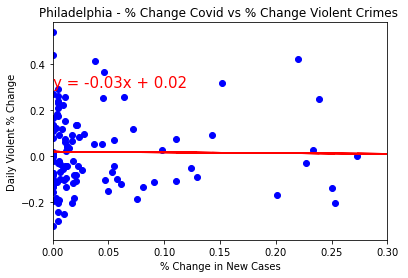

In [47]:
#Plot violent change for Phily
x_axis = daily_phily["% Change in New Cases"]
y_axis = daily_phily["Daily Violent % Change"]
plt.title("Philadelphia - % Change Covid vs % Change Violent Crimes ")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Violent % Change")
plt.xlim(0, .3)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

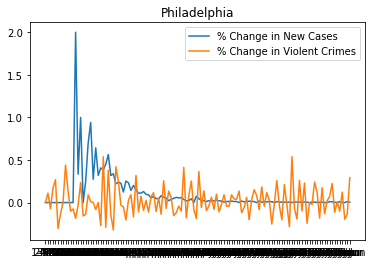

In [32]:
plt.plot(daily_phily["Date"], daily_phily["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_phily["Date"], daily_phily["Daily Violent % Change"], label="% Change in Violent Crimes")
plt.title("Philadelphia")
plt.legend(loc='upper right');
plt.show()

The r-squared is: 0.006790863685509771


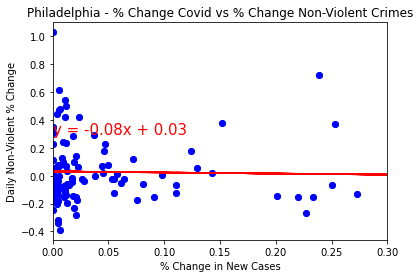

In [48]:
#Plot non-violent change for Phily
x_axis = daily_phily["% Change in New Cases"]
y_axis = daily_phily["Daily Non-Violent % Change"]
plt.title("Philadelphia - % Change Covid vs % Change Non-Violent Crimes")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Non-Violent % Change")
plt.xlim(0, .3)
plt.scatter(x_axis, y_axis)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

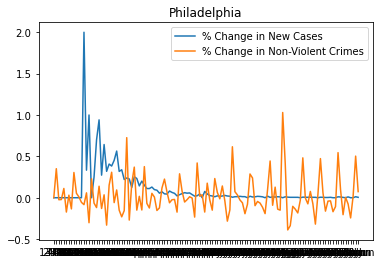

In [31]:
plt.plot(daily_phily["Date"], daily_phily["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_phily["Date"], daily_phily["Daily Non-Violent % Change"], label="% Change in Non-Violent Crimes")
plt.legend(loc='upper right');
plt.title("Philadelphia")
plt.show()

In [49]:
#-----------------------------------------------
#Create a new df for San Francisco specific stats
#------------------------------------------------
daily_sanfran = daily_merged_df.loc[daily_merged_df["City"]=="San Francisco"]
daily_sanfran

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
244,1-Mar,San Francisco,212,0,0.00,28,0,0.00,3,0,0.000
245,2-Mar,San Francisco,204,-8,-0.04,38,10,0.36,3,0,0.000
246,3-Mar,San Francisco,226,22,0.11,28,-10,-0.26,3,0,0.000
247,4-Mar,San Francisco,218,-8,-0.04,21,-7,-0.25,3,0,0.000
248,5-Mar,San Francisco,182,-36,-0.17,33,12,0.57,5,2,0.667
...,...,...,...,...,...,...,...,...,...,...,...
361,26-Jun,San Francisco,162,-10,-0.06,27,1,0.04,3403,103,0.031
362,27-Jun,San Francisco,197,35,0.22,21,-6,-0.22,3471,68,0.020
363,28-Jun,San Francisco,178,-19,-0.10,18,-3,-0.14,3515,44,0.013
364,29-Jun,San Francisco,187,9,0.05,29,11,0.61,3564,49,0.014


The r-squared is: 0.0018961111646458907


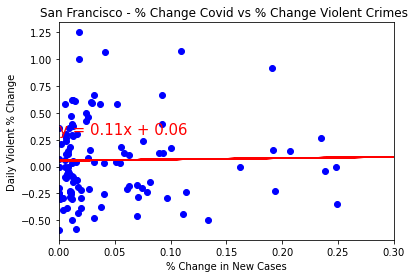

In [50]:
#Plot violent change for San Fran
x_axis = daily_sanfran["% Change in New Cases"]
y_axis = daily_sanfran["Daily Violent % Change"]
plt.title("San Francisco - % Change Covid vs % Change Violent Crimes ")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Violent % Change")
plt.xlim(0, .3)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

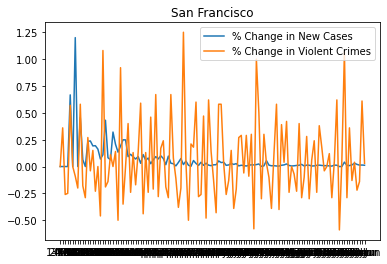

In [51]:
plt.plot(daily_sanfran["Date"], daily_sanfran["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_sanfran["Date"], daily_sanfran["Daily Violent % Change"], label="% Change in Violent Crimes")
plt.title("San Francisco")
plt.legend(loc='upper right');
plt.show()

The r-squared is: 0.012648638268465129


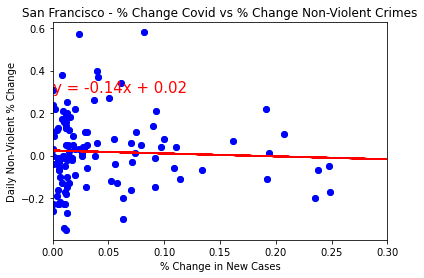

In [53]:
#Plot non-violent change for San Fran
x_axis = daily_sanfran["% Change in New Cases"]
y_axis = daily_sanfran["Daily Non-Violent % Change"]
plt.title("San Francisco - % Change Covid vs % Change Non-Violent Crimes")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Non-Violent % Change")
plt.xlim(0, .3)
plt.scatter(x_axis, y_axis)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

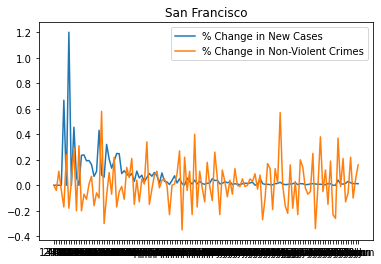

In [60]:
plt.plot(daily_sanfran["Date"], daily_sanfran["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_sanfran["Date"], daily_sanfran["Daily Non-Violent % Change"], label="% Change in Non-Violent Crimes")
plt.legend(loc='upper right');
plt.title("San Francisco")
plt.show()

In [55]:
#-----------------------------------------------
#Create a new df for LA specific stats
#------------------------------------------------
daily_la = daily_merged_df.loc[daily_merged_df["City"]=="Los Angeles"]
daily_la

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
122,1-Mar,Los Angeles,434,0,0.0000,186,0,0.0000,1,0,0.000
123,2-Mar,Los Angeles,438,4,0.0092,159,-27,-0.1452,1,0,0.000
124,3-Mar,Los Angeles,391,-47,-0.1073,170,11,0.0692,1,0,0.000
125,4-Mar,Los Angeles,353,-38,-0.0972,157,-13,-0.0765,7,6,6.000
126,5-Mar,Los Angeles,415,62,0.1756,136,-21,-0.1338,11,4,0.571
...,...,...,...,...,...,...,...,...,...,...,...
239,26-Jun,Los Angeles,435,5,0.0116,179,-3,-0.0165,93232,1765,0.019
240,27-Jun,Los Angeles,370,-65,-0.1494,152,-27,-0.1508,95371,2139,0.023
241,28-Jun,Los Angeles,345,-25,-0.0676,167,15,0.0987,97894,2523,0.026
242,29-Jun,Los Angeles,410,65,0.1884,153,-14,-0.0838,100772,2878,0.029


The r-squared is: 0.0024973063874588644


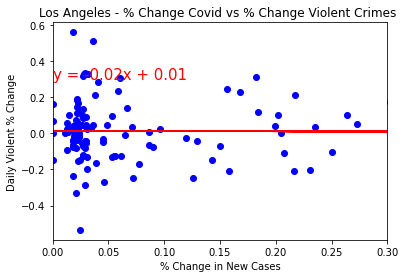

In [56]:
#Plot violent change for LA
x_axis = daily_la["% Change in New Cases"]
y_axis = daily_la["Daily Violent % Change"]
plt.title("Los Angeles - % Change Covid vs % Change Violent Crimes ")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Violent % Change")
plt.xlim(0, .3)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

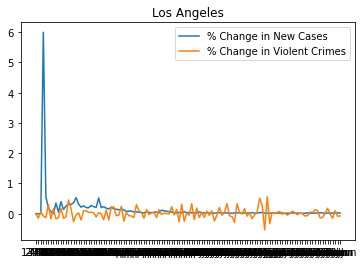

In [59]:
plt.plot(daily_la["Date"], daily_la["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_la["Date"], daily_la["Daily Violent % Change"], label="% Change in Violent Crimes")
plt.title("Los Angeles")
plt.legend(loc='upper right');
plt.show()

The r-squared is: 0.005954507347094986


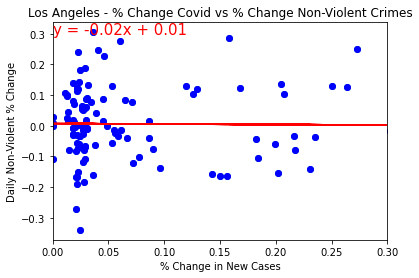

In [58]:
#Plot non-violent change for LA
x_axis = daily_la["% Change in New Cases"]
y_axis = daily_la["Daily Non-Violent % Change"]
plt.title("Los Angeles - % Change Covid vs % Change Non-Violent Crimes")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Non-Violent % Change")
plt.xlim(0, .3)
plt.scatter(x_axis, y_axis)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

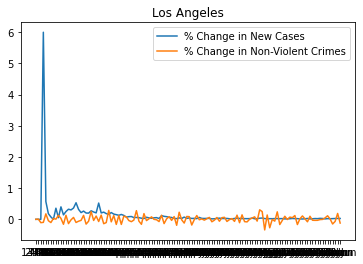

In [62]:
plt.plot(daily_la["Date"], daily_la["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_la["Date"], daily_la["Daily Non-Violent % Change"], label="% Change in Non-Violent Crimes")
plt.legend(loc='upper right');
plt.title("Los Angeles")
plt.show()

In [63]:
#-----------------------------------------------
#Create a new df for Denver specific stats
#------------------------------------------------
daily_denver = daily_merged_df.loc[daily_merged_df["City"]=="Denver"]
daily_denver

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
488,1-Mar,Denver,167,0,0.000,30,0,0.000,0,0,0.000
489,2-Mar,Denver,270,103,0.617,25,-5,-0.167,0,0,0.000
490,3-Mar,Denver,225,-45,-0.167,21,-4,-0.160,0,0,0.000
491,4-Mar,Denver,240,15,0.067,16,-5,-0.238,0,0,0.000
492,5-Mar,Denver,251,11,0.046,18,2,0.125,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
605,26-Jun,Denver,177,-61,-0.256,26,4,0.182,6901,66,0.010
606,27-Jun,Denver,160,-17,-0.096,33,7,0.269,6947,46,0.007
607,28-Jun,Denver,180,20,0.125,47,14,0.424,7007,60,0.009
608,29-Jun,Denver,222,42,0.233,25,-22,-0.468,7065,58,0.008


The r-squared is: 0.01387427211584093


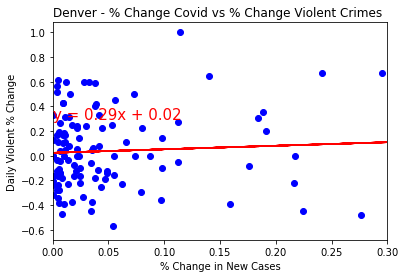

In [64]:
#Plot violent change for Denver
x_axis = daily_denver["% Change in New Cases"]
y_axis = daily_denver["Daily Violent % Change"]
plt.title("Denver - % Change Covid vs % Change Violent Crimes ")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Violent % Change")
plt.xlim(0, .3)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

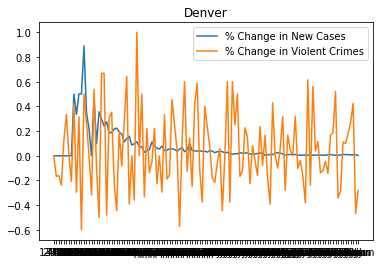

In [65]:
plt.plot(daily_denver["Date"], daily_denver["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_denver["Date"], daily_denver["Daily Violent % Change"], label="% Change in Violent Crimes")
plt.title("Denver")
plt.legend(loc='upper right');
plt.show()

The r-squared is: 0.0004069635214604343


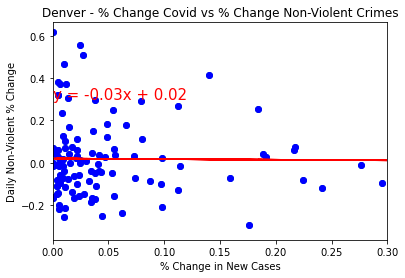

In [66]:
#Plot non-violent change for Denver
x_axis = daily_denver["% Change in New Cases"]
y_axis = daily_denver["Daily Non-Violent % Change"]
plt.title("Denver - % Change Covid vs % Change Non-Violent Crimes")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Non-Violent % Change")
plt.xlim(0, .3)
plt.scatter(x_axis, y_axis)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

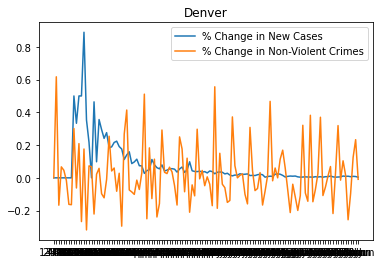

In [67]:
plt.plot(daily_denver["Date"], daily_denver["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_denver["Date"], daily_denver["Daily Non-Violent % Change"], label="% Change in Non-Violent Crimes")
plt.legend(loc='upper right');
plt.title("Denver")
plt.show()

In [68]:
#-----------------------------------------------
#Create a new df for Seattle specific stats
#------------------------------------------------
daily_seattle = daily_merged_df.loc[daily_merged_df["City"]=="Seattle"]
daily_seattle

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
366,1-Mar,Seattle,228,0,0.000,48,0,0.000,11,7,1.750
367,2-Mar,Seattle,134,-94,-0.412,25,-23,-0.479,15,4,0.364
368,3-Mar,Seattle,144,10,0.075,33,8,0.320,22,7,0.467
369,4-Mar,Seattle,133,-11,-0.076,26,-7,-0.212,33,11,0.500
370,5-Mar,Seattle,148,15,0.113,43,17,0.654,52,19,0.576
...,...,...,...,...,...,...,...,...,...,...,...
483,26-Jun,Seattle,154,-5,-0.031,39,1,0.026,9697,83,0.009
484,27-Jun,Seattle,126,-28,-0.182,30,-9,-0.231,9821,124,0.013
485,28-Jun,Seattle,133,7,0.056,30,0,0.000,9903,82,0.008
486,29-Jun,Seattle,152,19,0.143,34,4,0.133,10071,168,0.017


The r-squared is: 0.00011058588244282538


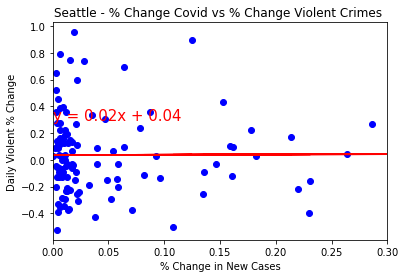

In [69]:
#Plot violent change for Seattle
x_axis = daily_seattle["% Change in New Cases"]
y_axis = daily_seattle["Daily Violent % Change"]
plt.title("Seattle - % Change Covid vs % Change Violent Crimes ")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Violent % Change")
plt.xlim(0, .3)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

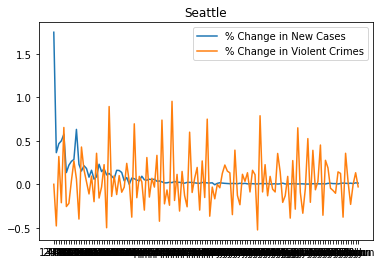

In [70]:
plt.plot(daily_seattle["Date"], daily_seattle["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_seattle["Date"], daily_seattle["Daily Violent % Change"], label="% Change in Violent Crimes")
plt.title("Seattle")
plt.legend(loc='upper right');
plt.show()

The r-squared is: 0.0004745014353206029


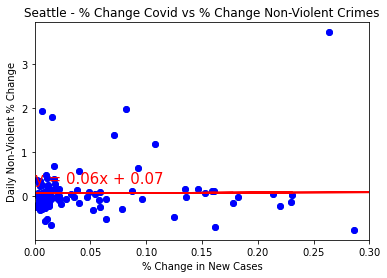

In [71]:
#Plot non-violent change for Seattle
x_axis = daily_seattle["% Change in New Cases"]
y_axis = daily_seattle["Daily Non-Violent % Change"]
plt.title("Seattle - % Change Covid vs % Change Non-Violent Crimes")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Non-Violent % Change")
plt.xlim(0, .3)
plt.scatter(x_axis, y_axis)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

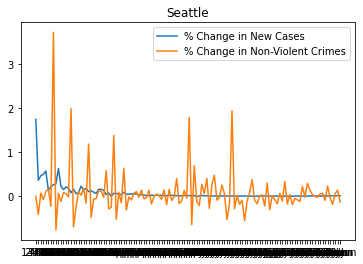

In [72]:
plt.plot(daily_seattle["Date"], daily_seattle["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_seattle["Date"], daily_seattle["Daily Non-Violent % Change"], label="% Change in Non-Violent Crimes")
plt.legend(loc='upper right');
plt.title("Seattle")
plt.show()

In [73]:
#-----------------------------------------------
#Create a new df for DC specific stats
#------------------------------------------------
daily_dc = daily_merged_df.loc[daily_merged_df["City"]=="Washington DC"]
daily_dc

,Date,City,Non-Violent Count,Daily Non-Violent Change,Daily Non-Violent % Change,Violent Count,Daily Violent Change,Daily Violent % Change,Cum_Open_Cases,Change in New Cases,% Change in New Cases
610,1-Mar,Washington DC,74,0,0.000,8,0,0.000,0,0,0.000
611,2-Mar,Washington DC,83,9,0.122,4,-4,-0.500,0,0,0.000
612,3-Mar,Washington DC,77,-6,-0.072,1,-3,-0.750,0,0,0.000
613,4-Mar,Washington DC,75,-2,-0.026,3,2,2.000,0,0,0.000
614,5-Mar,Washington DC,74,-1,-0.013,6,3,1.000,0,0,0.000
...,...,...,...,...,...,...,...,...,...,...,...
727,26-Jun,Washington DC,40,-28,-0.412,7,-2,-0.222,10185,26,0.003
728,27-Jun,Washington DC,49,9,0.225,8,1,0.143,10216,31,0.003
729,28-Jun,Washington DC,69,20,0.408,6,-2,-0.250,10248,32,0.003
730,29-Jun,Washington DC,62,-7,-0.101,12,6,1.000,10292,44,0.004


The r-squared is: 0.0747430623545706


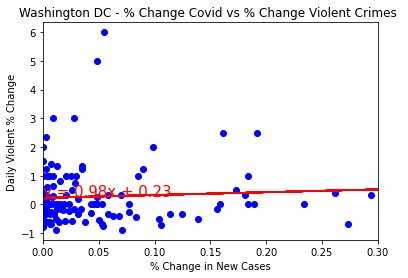

In [74]:
#Plot violent change for DC
x_axis = daily_dc["% Change in New Cases"]
y_axis = daily_dc["Daily Violent % Change"]
plt.title("Washington DC - % Change Covid vs % Change Violent Crimes ")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Violent % Change")
plt.xlim(0, .3)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

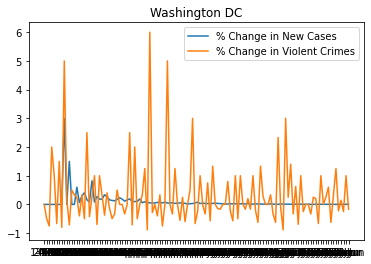

In [75]:
plt.plot(daily_dc["Date"], daily_dc["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_dc["Date"], daily_dc["Daily Violent % Change"], label="% Change in Violent Crimes")
plt.title("Washington DC")
plt.legend(loc='upper right');
plt.show()

The r-squared is: 0.041946915932668846


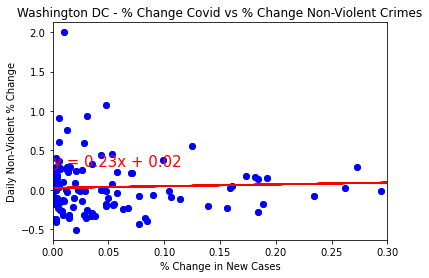

In [76]:
#Plot non-violent change for DC
x_axis = daily_dc["% Change in New Cases"]
y_axis = daily_dc["Daily Non-Violent % Change"]
plt.title("Washington DC - % Change Covid vs % Change Non-Violent Crimes")
plt.xlabel("% Change in New Cases")
plt.ylabel("Daily Non-Violent % Change")
plt.xlim(0, .3)
plt.scatter(x_axis, y_axis)

#Linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_axis, y_axis, facecolors="blue")
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(0,.3),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}")

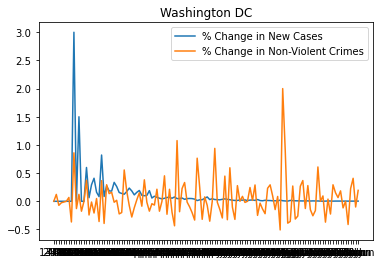

In [77]:
plt.plot(daily_dc["Date"], daily_dc["% Change in New Cases"], label="% Change in New Cases")
plt.plot(daily_dc["Date"], daily_dc["Daily Non-Violent % Change"], label="% Change in Non-Violent Crimes")
plt.legend(loc='upper right');
plt.title("Washington DC")
plt.show()